In [3]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [17]:
df= pd.read_csv("/content/Naive-Bayes-Classification-Data.csv")
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [6]:
df.corr()

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


In [18]:
df.isnull()

,glucose,bloodpressure,diabetes
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
990,False,False,False
991,False,False,False
992,False,False,False
993,False,False,False


In [19]:
df.dropna()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


<ipython-input-8-f1671c47ea97>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diabetes',width=.2,palette=['green','red'])


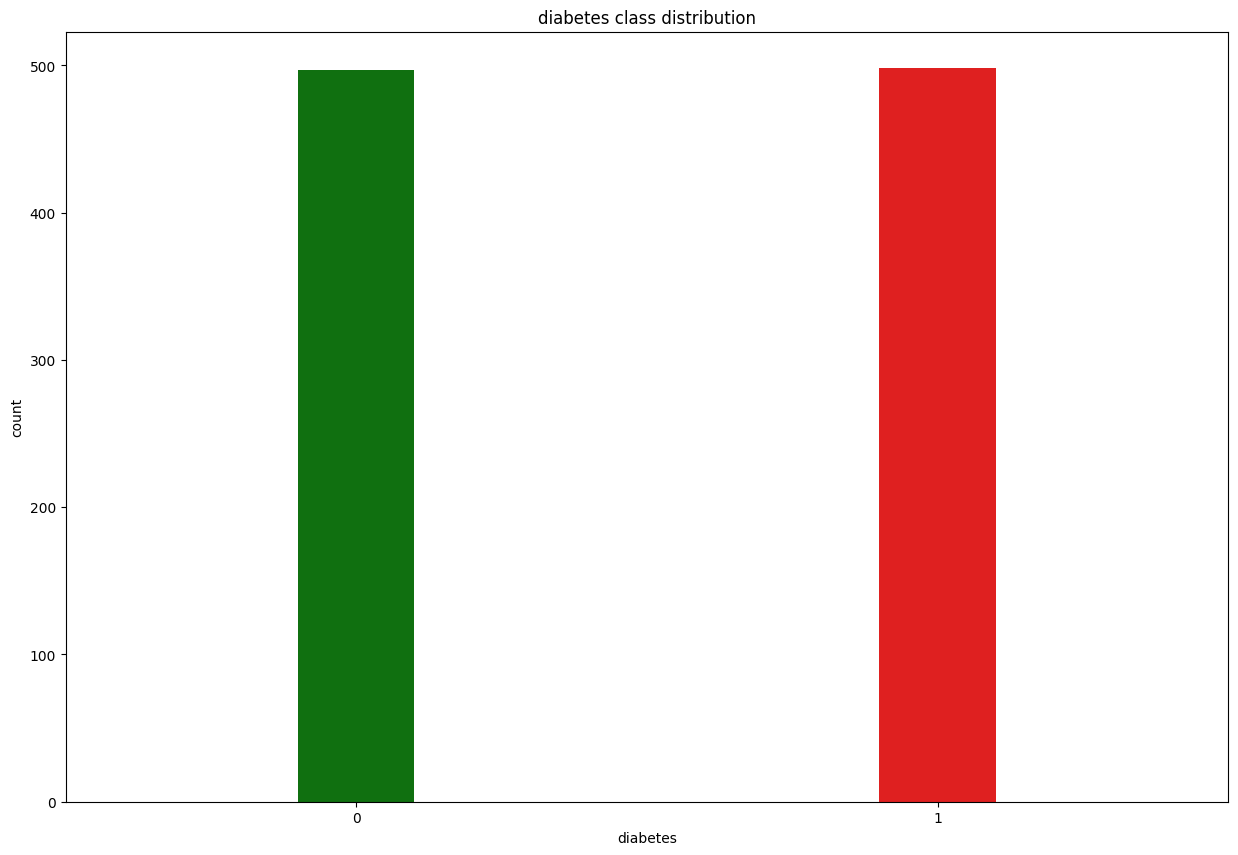

In [8]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='diabetes',width=.2,palette=['green','red'])
plt.title("diabetes class distribution")
plt.show()

In [9]:
df.skew()


glucose          0.093933
bloodpressure   -0.260715
diabetes        -0.002013
dtype: float64

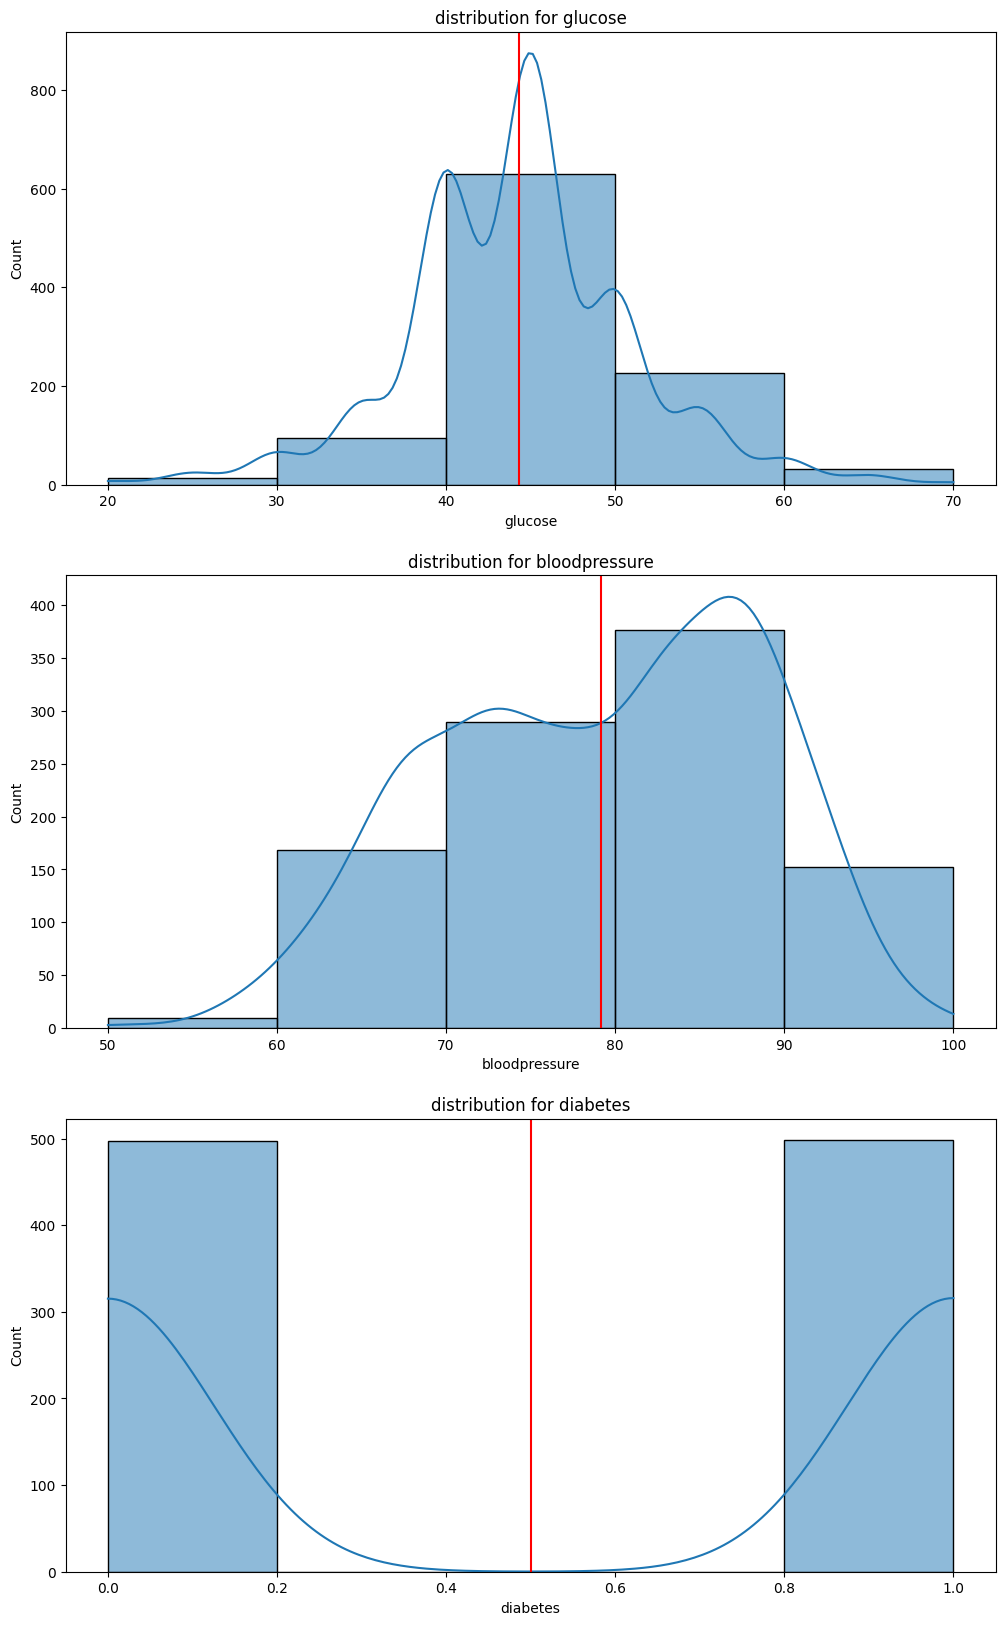

In [10]:
fig,ax= plt.subplots(3,1 , figsize=(12,20))
rw=0
cl=0
for col in df.columns:

    sns.histplot(data=df,x=col,ax=ax[rw],kde=True,bins=5)
    ax[rw].axvline(df[col].mean(),color='red')
    ax[rw].set_title("distribution for " + col)
    rw=rw+1
plt.show()

In [11]:
X=df.drop(columns='diabetes')
y=df['diabetes']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [13]:
from sklearn.naive_bayes import GaussianNB
NBmodel=GaussianNB()
NBmodel.fit(X_train,y_train)

GaussianNB()

In [14]:
y_pred=NBmodel.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0])

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

#evaluate the model

def compute_evaluation_metric(y_actual,y_predicted):
    print(f"Accuracy score - {accuracy_score(y_actual,y_predicted)}")
    print(f"Confusion matrix : \n {confusion_matrix(y_actual,y_predicted)}")
    print(f"classification report : \n-{classification_report(y_actual,y_predicted)}")


In [16]:
compute_evaluation_metric(y_test,y_pred)

Accuracy score - 0.949748743718593
Confusion matrix : 
 [[95  3]
 [ 7 94]]
classification report : 
-              precision    recall  f1-score   support

           0       0.93      0.97      0.95        98
           1       0.97      0.93      0.95       101

    accuracy                           0.95       199
   macro avg       0.95      0.95      0.95       199
weighted avg       0.95      0.95      0.95       199



In [23]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

glucose = float(input("Enter glucose level: "))
blood_pressure = float(input("Enter blood pressure: "))

prediction = classifier.predict([[glucose, blood_pressure]])


if prediction[0] == 'yes':
    print("Yes")
else:
    print("No")

Enter glucose level: 40
Enter blood pressure: 80
No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
